<a href="https://colab.research.google.com/github/BrouthenKamel/Binary-Classification-Training/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

In [3]:
import sklearn

In [4]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784', version=1)

In [6]:
#checkpoint

In [ ]:
for i in mnist.keys():
  print(f"The key = {i}")
  print(mnist[i])

In [9]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [10]:
X, y = mnist["data"], mnist["target"]

In [12]:
print(f"Data matrix shape = {X.shape} , Traget's = {y.shape}")

Data matrix shape = (70000, 784) , Traget's = (70000,)


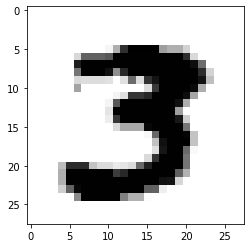

'3'

In [39]:
i = 27
img = X.to_numpy()[i].reshape(28, 28)
plt.imshow(img, cmap=mp.cm.binary, interpolation = "nearest")
plt.show()
y[i]


In [43]:
y = y.astype(np.uint8)
X = X.to_numpy()

In [44]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
split = 60000
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [50]:
y_train_2 = (y_train == 2).astype(np.uint8)
y_test_2 = (y_test == 2).astype(np.uint8)


In [52]:
y_test_2

60000    0
60001    1
60002    0
60003    0
60004    0
        ..
69995    1
69996    0
69997    0
69998    0
69999    0
Name: class, Length: 10000, dtype: uint8

In [53]:
from sklearn.linear_model import SGDClassifier

In [54]:
sgd = SGDClassifier(random_state = 42)
sgd.fit(X_train, y_train_2)

SGDClassifier(random_state=42)

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
cross_val_score(sgd, X_train, y_train_2, cv=3, scoring="accuracy")

array([0.96645, 0.95895, 0.904  ])

In [57]:
from sklearn.model_selection import cross_val_predict

In [58]:
y_train_pred = cross_val_predict(sgd, X_train, y_train_2, cv = 3)

In [59]:
from sklearn.metrics import confusion_matrix

In [63]:
[ tn, fp ], [fn, tp] = confusion_matrix(y_train_2, y_train_pred)
# rows are actual [0,1], columns are predictions [0,1]
#   [ [ tn, fp ] ,
#     [ fn, tp ] ]

In [64]:
from sklearn.metrics import precision_score, recall_score

In [67]:
print(f"precision = {precision_score(y_train_2, y_train_pred)}")
print(f"recal = {recall_score(y_train_2, y_train_pred)}")

precision = 0.6685199894095843
recal = 0.8475998657267539


In [68]:
from sklearn.metrics import f1_score

In [69]:
f1_score(y_train_2, y_train_pred)

0.7474837181764358

In [70]:
y_scores = cross_val_predict(sgd,X_train, y_train_2, cv=3, method="decision_function")

In [71]:
y_scores

array([-36851.09465219, -31272.70892659, -21491.02754016, ...,
       -30052.05804538, -18789.24492043, -20051.24297549])

In [72]:
from sklearn.metrics import precision_recall_curve

In [73]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

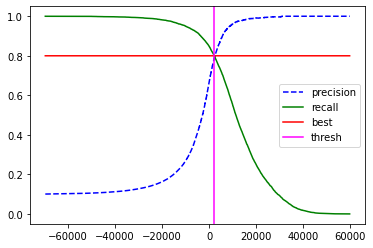

In [104]:
plt.plot(thresholds, precisions[:-1], "b--", label="precision")
plt.plot(thresholds, recalls[:-1], "g-", label="recall")
plt.plot(thresholds, np.full(precisions.shape[0]-1, 0.8), "r", label="best")
plt.axvline(x=2000, color="magenta", label="thresh")
plt.legend()
plt.show()

In [105]:
y_train_best = ( y_scores >= 2000 ).astype(np.uint8)

In [106]:
y_train_best

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [107]:
print(f"precision = {precision_score(y_train_2, y_train_best)}")
print(f"recal = {recall_score(y_train_2, y_train_best)}")
print(f"f1 score = {f1_score(y_train_2, y_train_best)}")


precision = 0.780714635340186
recal = 0.8031218529707955
f1 score = 0.791759741871432


In [108]:
from sklearn.metrics import roc_curve

In [112]:
fpr, tpr, thresholds = roc_curve(y_train_2, y_scores)

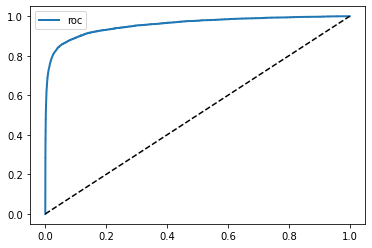

In [114]:
plt.plot(fpr, tpr, linewidth=2, label="roc")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.show()

In [115]:
from sklearn.metrics import roc_auc_score

In [119]:
print(f"the area under curve = {roc_auc_score(y_train_2, y_scores)}")

the area under curve = 0.9568395257681235
